In [0]:
#hide
import numpy as np
import matplotlib.pyplot as plt
from mctc.utils import *
from mctc import ctc

# MCTC

> Matrix-valued and banded extensions of the CTC loss in pytorch and cupy.

## Install

`pip install your_project_name`

## How to use

Comparison against builtin pytorch implementation of the standard CTC loss:

In [30]:
sample_inputs = logits, targets, input_lengths, target_lengths = ctc.generate_sample_inputs(T_min=450, T_max=500, N=128, C=20, L_min=80, L_max=100)
print(f'pytorch loss: {ctc.loss_pytorch(*sample_inputs):.4f}')
print(f'mctc loss:    {ctc.loss_cupy(*sample_inputs):.4f}')

pytorch loss: 12.7165
mctc loss:    12.7165


### Speed comparison

Pytorch:

In [31]:
report(benchmark_fwd_bwd(ctc.loss_pytorch, *sample_inputs))

fwd: 4.86ms (3.85-5.44ms)
bwd: 9.61ms (8.40-11.04ms)
tot: 14.47ms (12.25-15.72ms)


MCTC:

In [32]:
report(benchmark_fwd_bwd(ctc.loss_cupy, *sample_inputs))

fwd: 6.66ms (6.45-7.09ms)
bwd: 5.22ms (4.94-5.50ms)
tot: 11.88ms (11.43-12.59ms)


### Alignments

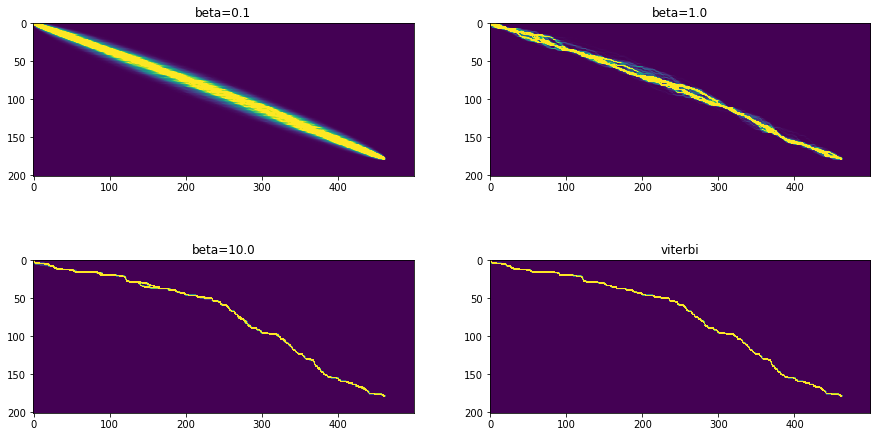

In [33]:
betas = [0.1, 1.0, 10.]
alignments = {f'beta={beta:.1f}': to_np(ctc.soft_alignments(*sample_inputs, beta=beta)) for beta in betas}
alignments['viterbi'] = to_np(ctc.viterbi_alignments(*sample_inputs))
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
for (ax, (title, data)) in zip(np.array(axs).flatten(), alignments.items()):
    ax.imshow(data[:, 0].T, vmax=0.05);
    ax.set_title(title)  